In [111]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
# ^^^ pyforest auto-imports - don't write above this line
train=pd.read_csv(r'D:\Data Science\My Projects\Hackthons\Practice Problem HR Analytics/train_LZdllcl.csv')
test=pd.read_csv(r'D:\Data Science\My Projects\Hackthons\Practice Problem HR Analytics/test_2umaH9m.csv')

In [112]:
test=pd.read_csv(r'D:\Data Science\My Projects\Hackthons\Practice Problem HR Analytics/test_2umaH9m.csv')

In [113]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [114]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [115]:
train.isnull().sum()[train.isnull().sum()!=0]/train.shape[0]

education               0.043953
previous_year_rating    0.075244
dtype: float64

In [116]:
test.isnull().sum()[test.isnull().sum()!=0]/test.shape[0]

education               0.044019
previous_year_rating    0.077139
dtype: float64

In [117]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


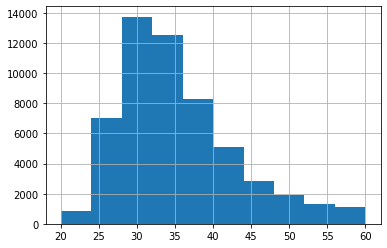

In [118]:
train.age.hist()

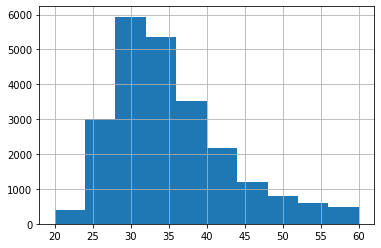

In [119]:
test.age.hist()

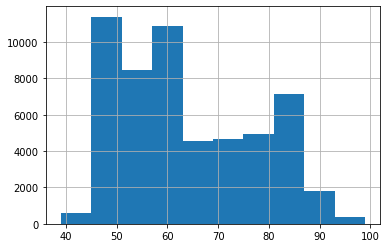

In [10]:
train.avg_training_score.hist()

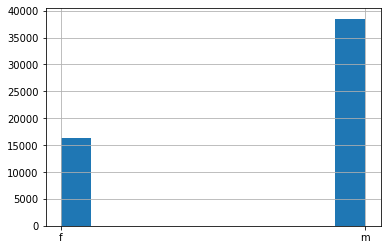

In [11]:
train.gender.hist()

department


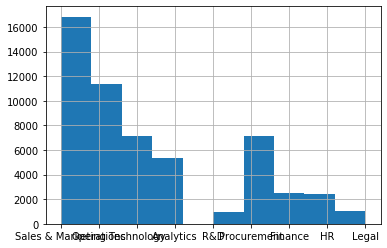

region


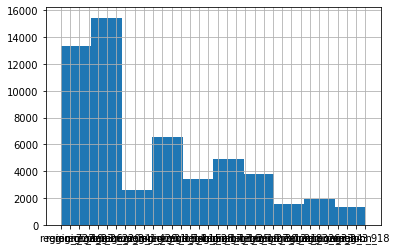

education


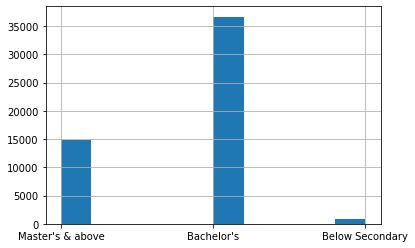

gender


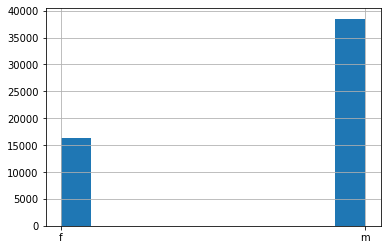

recruitment_channel


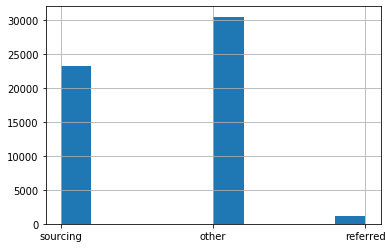

no_of_trainings


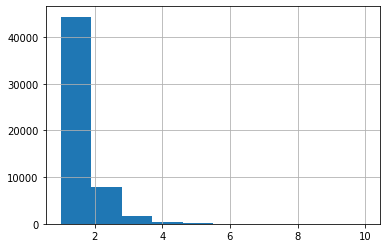

age


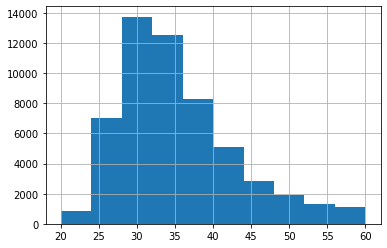

previous_year_rating


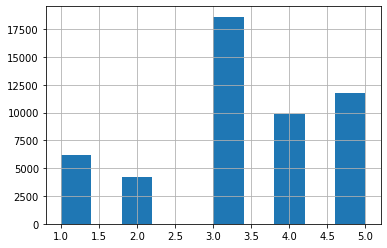

length_of_service


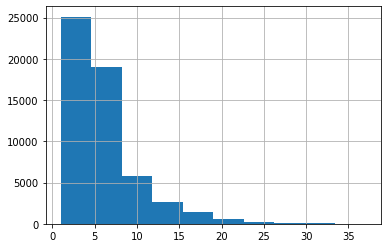

KPIs_met >80%


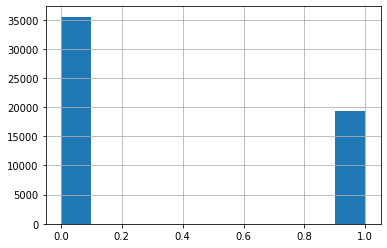

awards_won?


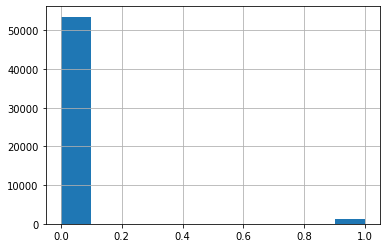

avg_training_score


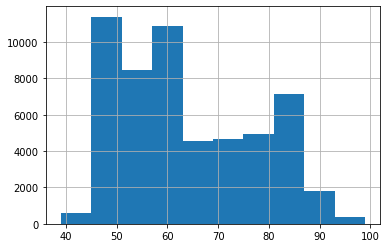

is_promoted


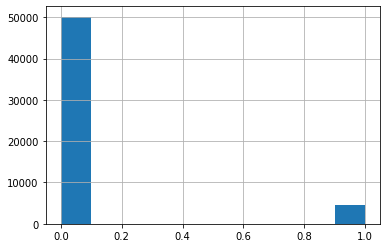

In [12]:
for i in train.columns:
    if i!='employee_id':
        train[i].hist()
        print(i)
        plt.show()

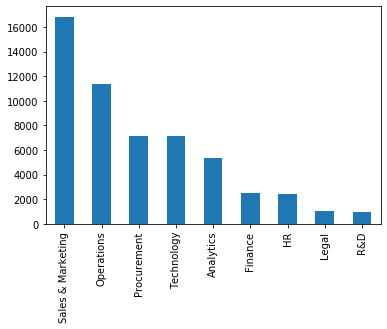

In [13]:
train['department'].value_counts().plot(kind='bar')


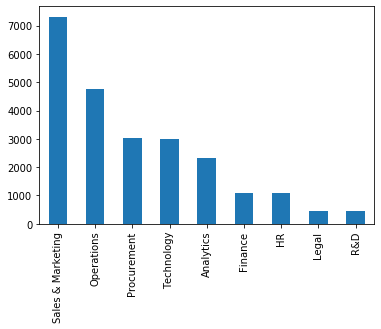

In [14]:
test['department'].value_counts().plot(kind='bar')

In [1]:
s = (train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)
d = (train.dtypes != 'object')
num_cols = list(d[d].index)

print("Numerical variables:")
print(num_cols)

NameError: name 'train' is not defined

department
9


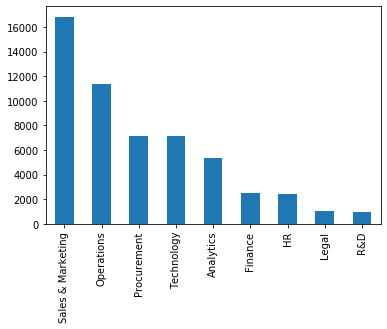

region
34


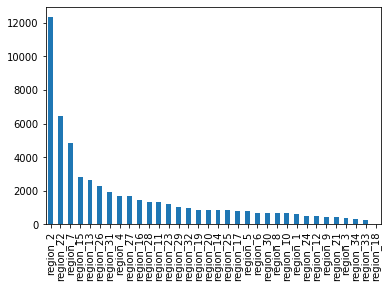

education
3


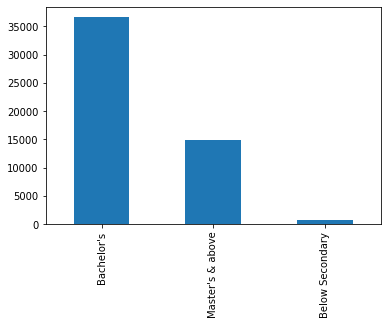

gender
2


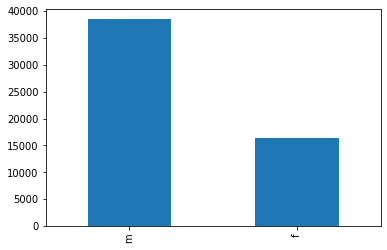

recruitment_channel
3


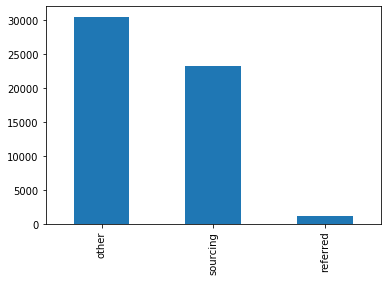

In [16]:
for i in object_cols:
    train[i].value_counts().plot(kind='bar')
    print(i)
    print(train[i].nunique())
    plt.show()

no_of_trainings


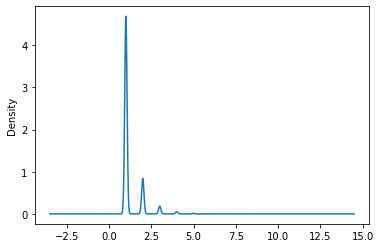

age


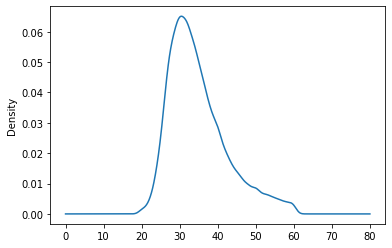

previous_year_rating


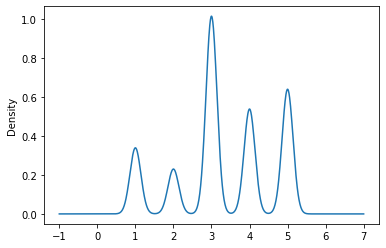

length_of_service


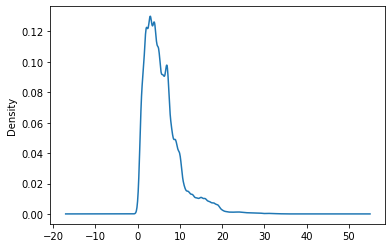

KPIs_met >80%


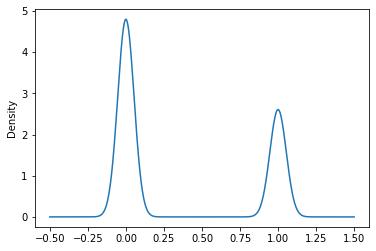

awards_won?


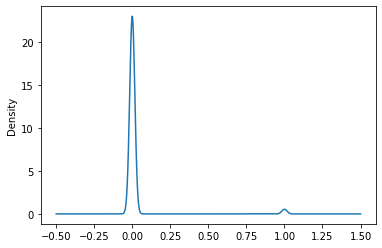

avg_training_score


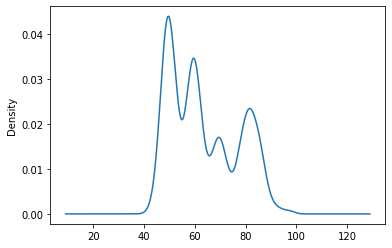

is_promoted


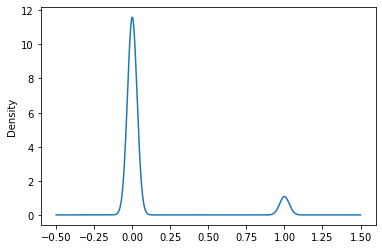

In [17]:
for i in num_cols:
    if i!='employee_id':
        train[i].plot(kind='density')
        print(i)
        plt.show()

In [18]:
def missing_values_table(train):
        # Total missing values
        mis_val = train.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * train.isnull().sum() / len(train)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(train.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [19]:
missing_values_table(train)

Your selected dataframe has 14 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
previous_year_rating,4124,7.5
education,2409,4.4


department


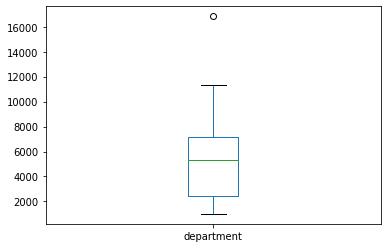

region


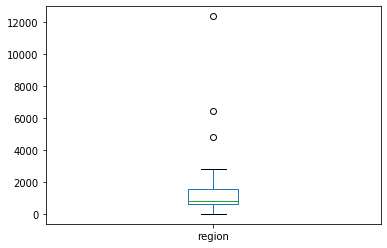

education


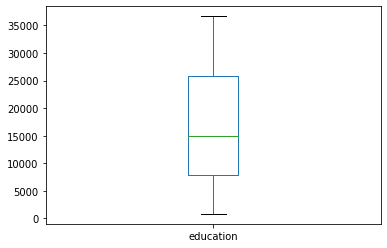

gender


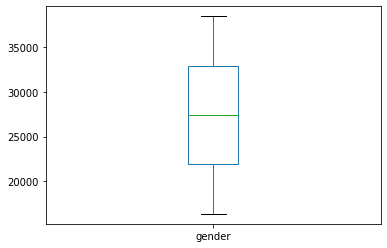

recruitment_channel


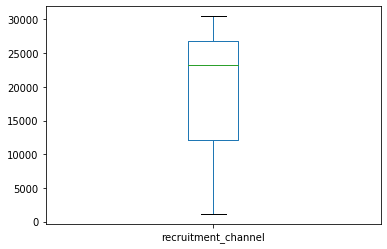

no_of_trainings


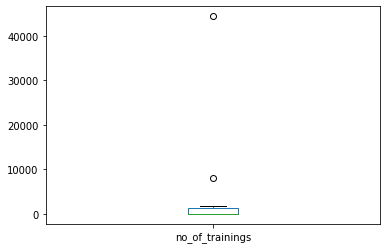

age


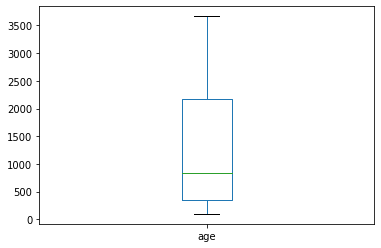

previous_year_rating


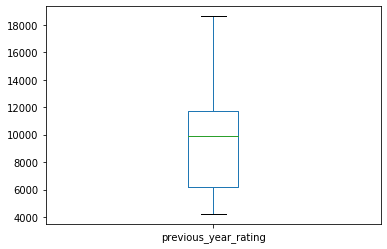

length_of_service


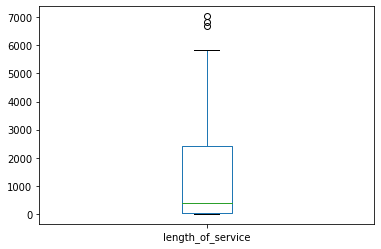

KPIs_met >80%


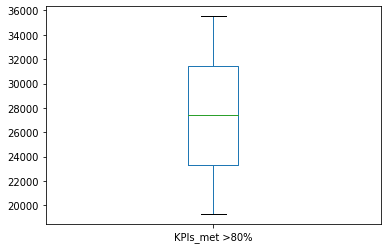

awards_won?


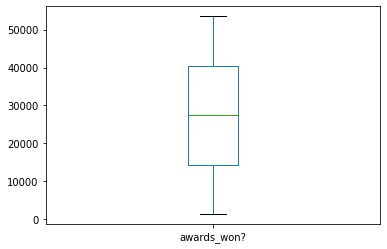

avg_training_score


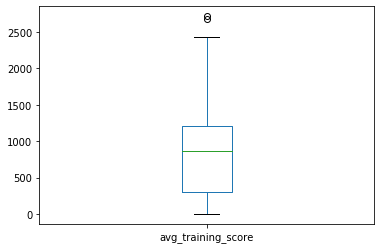

is_promoted


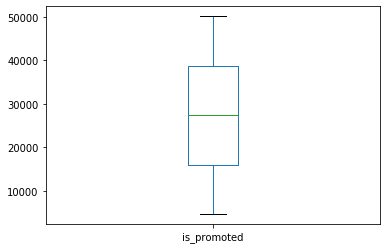

In [20]:
for i in train.columns:
    if i!='employee_id':
        train[i].value_counts().plot(kind='box')
        print(i)
        plt.show()

In [21]:
#sns.pairplot(train)

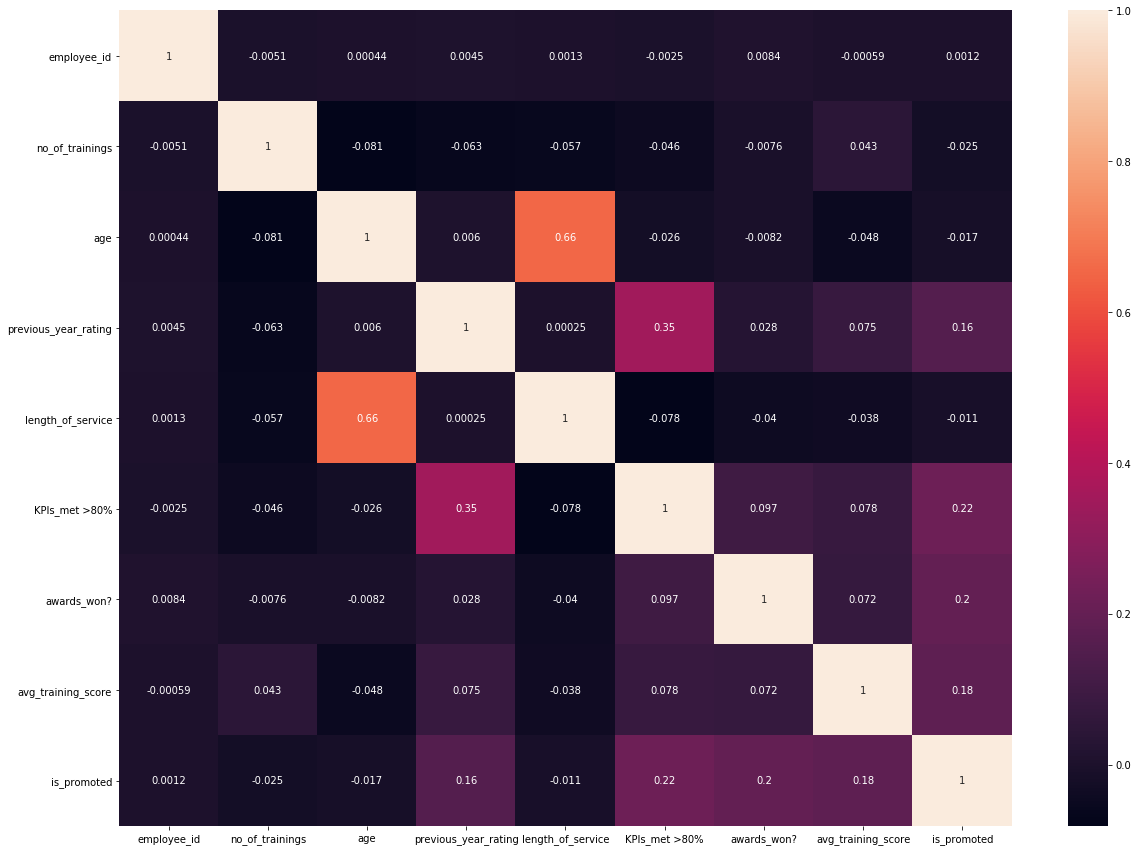

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(),annot=True)

In [23]:
train['previous_year_rating']=train['previous_year_rating'].fillna(train.groupby('department')['previous_year_rating'].transform('median'))

In [24]:
train['education']=train['education'].fillna(train['education'].mode()[0])

In [25]:
missing_values_table(train)

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [85]:
test['previous_year_rating']=test['previous_year_rating'].fillna(test.groupby('department')['previous_year_rating'].transform('median'))

In [86]:
test['education']=test['education'].fillna(test['education'].mode()[0])

In [87]:
missing_values_table(test)


Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [88]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70


In [30]:
train.isnull().sum()[train.isnull().sum()!=0]

Series([], dtype: int64)

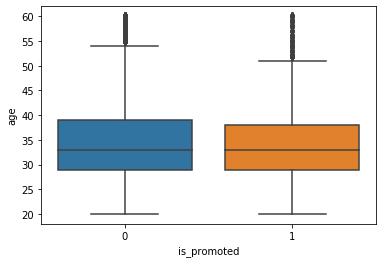

In [31]:
sns.boxplot(train['is_promoted'],train['age'])

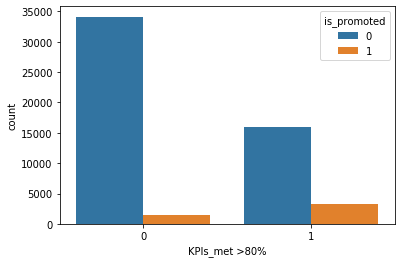

In [32]:
sns.countplot(train['KPIs_met >80%'],hue=train['is_promoted'])

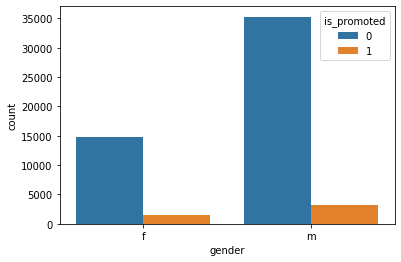

In [33]:
sns.countplot(train['gender'],hue=train['is_promoted'])

In [105]:
#sns.countplot(train['recruitment_channel'],hue=train['is_promoted'])


array([    0,     1,     2, ..., 35513, 35521, 35534])

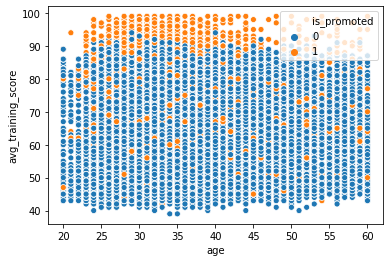

In [34]:
sns.scatterplot(train['age'],train['avg_training_score'],hue=train['is_promoted'])

In [35]:
# there is no relation between the age with avg_training and with 

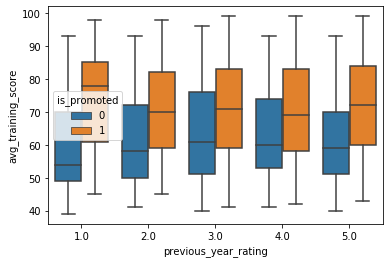

In [36]:
sns.boxplot(train['previous_year_rating'],train['avg_training_score'],hue=train['is_promoted'])

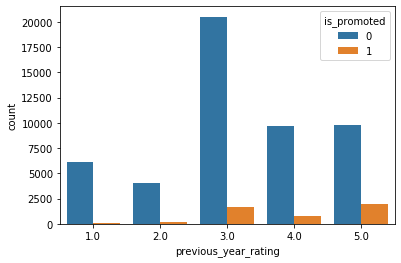

In [37]:
sns.countplot(train['previous_year_rating'],hue=train['is_promoted'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

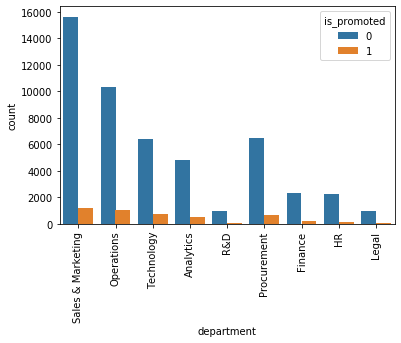

In [38]:
sns.countplot(train['department'],hue=train['is_promoted'])
plt.xticks(rotation=90)

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

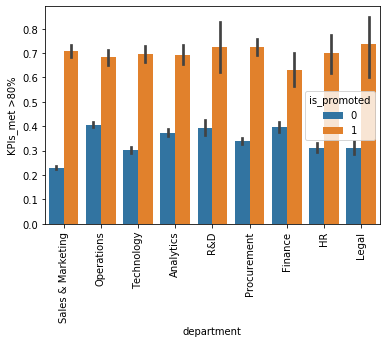

In [39]:
sns.barplot(train['department'],train['KPIs_met >80%'],hue=train['is_promoted'])
plt.xticks(rotation=90)
train['KPIs_met >80%'].value_counts()

In [40]:
for i in num_cols:
    if i!='employee_id':
        print('Skewness of ',i,'=',train[i].skew())

Skewness of  no_of_trainings = 3.445433937567454
Skewness of  age = 1.0074317710382241
Skewness of  previous_year_rating = -0.2840660948486551
Skewness of  length_of_service = 1.738061458740809
Skewness of  KPIs_met >80% = 0.61990886872196
Skewness of  awards_won? = 6.338913659392756
Skewness of  avg_training_score = 0.45190808551707995
Skewness of  is_promoted = 2.9723390958099434


In [41]:
new_train=train.copy()

In [42]:
new_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


In [43]:
new_train['age']=new_train['age'].transform(lambda x:np.log(x))

In [44]:
new_train['age']=new_train['age'].transform(lambda x:np.log(x))

In [45]:
new_train['age'].skew()

0.33594034799985867

In [46]:
new_train['length_of_service']=new_train['length_of_service'].transform(lambda x:np.log1p(x))

In [47]:
new_train['length_of_service'].skew()

0.05598358340595458

In [48]:
import scipy.stats as st
for i in num_cols:
    if i!='is_promoted':
        m=st.ttest_ind(train[train['is_promoted']==1][i],train[train['is_promoted']==0][i])[1]
        print(i,'=',m)

employee_id = 0.7777168540184165
no_of_trainings = 5.570013982389039e-09
age = 5.846304662205338e-05
previous_year_rating = 9.828976317221622e-282
length_of_service = 0.012491446010434766
KPIs_met >80% = 0.0
awards_won? = 0.0
avg_training_score = 0.0


In [49]:
import scipy.stats as st
for i in num_cols:
    if i!='is_promoted':
        m=st.ttest_ind(new_train[new_train['is_promoted']==1][i],new_train[new_train['is_promoted']==0][i])[1]
        print(i,'=',m)

employee_id = 0.7777168540184165
no_of_trainings = 5.570013982389039e-09
age = 0.0022987902302697956
previous_year_rating = 9.828976317221622e-282
length_of_service = 0.11391450387200701
KPIs_met >80% = 0.0
awards_won? = 0.0
avg_training_score = 0.0


In [50]:
from scipy.stats import chi2_contingency
p_list=[]
for col in object_cols:
    p=chi2_contingency(pd.crosstab(train['is_promoted'],train[col]))
    p_list.append([col,p[1]])
p_list

[['department', 9.882497107474489e-29],
 ['region', 7.275378205784026e-80],
 ['education', 5.380808967160731e-11],
 ['gender', 0.009765091521176657],
 ['recruitment_channel', 6.650937825577018e-05]]

In [51]:
l=['KPIs_met >80%','awards_won?','avg_training_score']
pl_list=[]
for col in l:
    p=chi2_contingency(pd.crosstab(train['is_promoted'],train[col]))
    pl_list.append([col,p[1]])
pl_list

[['KPIs_met >80%', 0.0], ['awards_won?', 0.0], ['avg_training_score', 0.0]]

In [52]:
X=new_train.drop(['employee_id','is_promoted'],axis=1)

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher
new_train['gender']=new_train['gender'].replace({'f':0,'m':1})
le=LabelEncoder()
new_train['education']=le.fit_transform(new_train['education'])
new_train['education'].unique()
deprt_dummy_features = pd.get_dummies(new_train['department'], 
                                    drop_first=True)
recr_dummy_features = pd.get_dummies(new_train['recruitment_channel'], 
                                    drop_first=True)

fh=FeatureHasher(n_features=8,input_type='string')
hashed_feature=fh.fit_transform(new_train['region'])
hashed_feature=hashed_feature.toarray()
  

In [54]:
deprt_dummy_features

,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
54803,0,0,0,0,0,0,0,1
54804,0,0,0,1,0,0,0,0
54805,0,0,0,0,0,0,0,0
54806,0,0,0,0,0,0,1,0


In [55]:
recr_dummy_features

,referred,sourcing
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
54803,0,1
54804,0,0
54805,0,0
54806,0,1


In [56]:
y=train['is_promoted']

In [57]:
hashed_feature=pd.DataFrame(hashed_feature)
hashed_feature

,0,1,2,3,4,5,6,7
0,1.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,1.0
1,0.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,3.0
2,0.0,2.0,-1.0,2.0,-1.0,-2.0,0.0,1.0
3,0.0,1.0,-1.0,2.0,0.0,-1.0,0.0,2.0
4,1.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
...,...,...,...,...,...,...,...,...
54803,-1.0,1.0,-1.0,2.0,-1.0,-2.0,0.0,1.0
54804,1.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
54805,0.0,1.0,-1.0,2.0,-1.0,-2.0,0.0,1.0
54806,0.0,2.0,-1.0,2.0,-1.0,-1.0,0.0,1.0


In [58]:
new_train=new_train.drop(['region','department','recruitment_channel'],axis=1)


print(sys.setrecursionlimit)


In [59]:
new_train

,employee_id,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,2,0,1,1.268453,5.0,2.197225,1,0,49,0
1,65141,0,1,1,1.224128,5.0,1.609438,0,0,60,0
2,7513,0,1,1,1.260266,3.0,2.079442,0,0,50,0
3,2542,0,1,2,1.298436,1.0,2.397895,0,0,50,0
4,48945,0,1,1,1.336753,3.0,1.098612,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,0,1,1,1.353565,3.0,2.890372,0,0,78,0
54804,74592,2,0,1,1.283962,2.0,1.945910,0,0,56,0
54805,13918,0,1,1,1.192660,5.0,1.386294,1,0,79,0
54806,13614,0,1,1,1.214110,1.0,1.098612,0,0,45,0


In [60]:
new_train=new_train.drop(['employee_id','is_promoted'],axis=1)

In [61]:
new_train

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,2,0,1,1.268453,5.0,2.197225,1,0,49
1,0,1,1,1.224128,5.0,1.609438,0,0,60
2,0,1,1,1.260266,3.0,2.079442,0,0,50
3,0,1,2,1.298436,1.0,2.397895,0,0,50
4,0,1,1,1.336753,3.0,1.098612,0,0,73
...,...,...,...,...,...,...,...,...,...
54803,0,1,1,1.353565,3.0,2.890372,0,0,78
54804,2,0,1,1.283962,2.0,1.945910,0,0,56
54805,0,1,1,1.192660,5.0,1.386294,1,0,79
54806,0,1,1,1.214110,1.0,1.098612,0,0,45


In [62]:
pdlist=[new_train,recr_dummy_features,deprt_dummy_features,hashed_feature]

In [63]:
X=pd.concat(pdlist,axis=1)
X
print(X.index.is_unique)
print(y.index.is_unique)

True
True


In [64]:
X

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,referred,...,Sales & Marketing,Technology,0,1,2,3,4,5,6,7
0,2,0,1,1.268453,5.0,2.197225,1,0,49,0,...,1,0,1.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,1.0
1,0,1,1,1.224128,5.0,1.609438,0,0,60,0,...,0,0,0.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,3.0
2,0,1,1,1.260266,3.0,2.079442,0,0,50,0,...,1,0,0.0,2.0,-1.0,2.0,-1.0,-2.0,0.0,1.0
3,0,1,2,1.298436,1.0,2.397895,0,0,50,0,...,1,0,0.0,1.0,-1.0,2.0,0.0,-1.0,0.0,2.0
4,0,1,1,1.336753,3.0,1.098612,0,0,73,0,...,0,1,1.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0,1,1,1.353565,3.0,2.890372,0,0,78,0,...,0,1,-1.0,1.0,-1.0,2.0,-1.0,-2.0,0.0,1.0
54804,2,0,1,1.283962,2.0,1.945910,0,0,56,0,...,0,0,1.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
54805,0,1,1,1.192660,5.0,1.386294,1,0,79,0,...,0,0,0.0,1.0,-1.0,2.0,-1.0,-2.0,0.0,1.0
54806,0,1,1,1.214110,1.0,1.098612,0,0,45,0,...,1,0,0.0,2.0,-1.0,2.0,-1.0,-1.0,0.0,1.0


In [65]:
len(X.index),len(y.index)


(54808, 54808)

In [66]:
y=pd.DataFrame(y)

In [67]:
import statsmodels.api as sm
Xc=sm.add_constant(X)
model=sm.Logit(y,Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.198652
         Iterations 8


LinAlgError: Singular matrix

In [ ]:
y=pd.DataFrame(y)


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame({'VIF':vif[1:]},index=X.columns)

ValueError: Shape of passed values is (26, 1), indices imply (27, 1)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

print('not_promoted', round(train['is_promoted'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('promoted', round(train['is_promoted'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

not_promoted 91.48 % of the dataset
promoted 8.52 % of the dataset
Train: [10461 10474 10478 ... 54805 54806 54807] Test: [    0     1     2 ... 11014 11015 11017]
Train: [    0     1     2 ... 54805 54806 54807] Test: [10461 10474 10478 ... 22173 22176 22178]
Train: [    0     1     2 ... 54805 54806 54807] Test: [21892 21894 21895 ... 33408 33423 33425]
Train: [    0     1     2 ... 54805 54806 54807] Test: [32839 32840 32841 ... 43972 43992 43995]
Train: [    0     1     2 ... 43972 43992 43995] Test: [43832 43833 43834 ... 54805 54806 54807]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.91481743 0.08518257]
[0.91488003 0.08511997]


In [71]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [72]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters


for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('auc:{}'.format(np.mean(auc_lst)))
print('---' * 45)


Length of X (train): 43847 | Length of y (train): 43847
Length of X (test): 10961 | Length of y (test): 10961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.7480327935573812
precision: 0.22170234786176693
recall: 0.7796519410977243
f1: 0.34519996020045235
auc:0.7623702665803446
---------------------------------------------------------------------------------------------------------------------------------------


In [73]:
print('auc:{}'.format(np.mean(auc_lst)))

auc:0.7623702665803446


In [74]:
labels = ['Not promoted', 'Promoted']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

Not promoted       0.97      0.74      0.84     10028
    Promoted       0.22      0.77      0.34       933

    accuracy                           0.75     10961
   macro avg       0.60      0.76      0.59     10961
weighted avg       0.91      0.75      0.80     10961



In [75]:
from scipy.stats import randint as sp_randint
rf_params ={
    "n_estimators": sp_randint(50,250),
    "max_depth": sp_randint(1,50),
    "min_samples_leaf": sp_randint(1,50),
    "min_samples_split": sp_randint(2,50),
    "max_features": sp_randint(1,15),
    "criterion": ["gini","entropy"]}

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
rf_sm = RandomForestClassifier()




rf_reg = RandomizedSearchCV(RandomForestClassifier(), rf_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters


for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rf_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rf_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)


Length of X (train): 43847 | Length of y (train): 43847
Length of X (test): 10961 | Length of y (test): 10961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9196526766507859
precision: 0.5755335329061426
recall: 0.3884872824631861
f1: 0.4549354578684759
---------------------------------------------------------------------------------------------------------------------------------------


In [77]:
labels = ['Not promoted', 'Promoted']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

Not promoted       0.94      0.99      0.96     10028
    Promoted       0.72      0.35      0.47       933

    accuracy                           0.93     10961
   macro avg       0.83      0.67      0.72     10961
weighted avg       0.92      0.93      0.92     10961



In [ ]:
smote_prediction = best_est.predict(original_Xtest)
smote_prediction=pd.DataFrame(smote_prediction)
smote_prediction.to_csv('train_pred.csv')
smote_prediction

In [89]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70


In [90]:
new_test=test.copy()

In [91]:
new_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70


In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher
new_test['gender']=new_test['gender'].replace({'f':0,'m':1})
le=LabelEncoder()
new_test['education']=le.fit_transform(new_test['education'])
new_test['education'].unique()
deprt_dummy_features1 = pd.get_dummies(new_test['department'], 
                                    drop_first=True)
recr_dummy_features1 = pd.get_dummies(new_test['recruitment_channel'], 
                                    drop_first=True)

fh1=FeatureHasher(n_features=8,input_type='string')
hashed_feature1=fh1.fit_transform(new_test['region'])
hashed_feature1=hashed_feature1.toarray()

In [93]:
new_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,0,1,sourcing,1,24,3.0,1,1,0,77
1,74430,HR,region_4,0,0,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,0,1,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,0,0,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,0,1,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,1,1,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,0,1,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,0,0,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,0,1,sourcing,3,27,3.0,1,0,0,70


In [94]:
hashed_feature1=pd.DataFrame(hashed_feature1)
hashed_feature1

,0,1,2,3,4,5,6,7
0,1.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
1,-1.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,1.0
2,0.0,1.0,-1.0,2.0,0.0,-2.0,0.0,1.0
3,0.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
4,0.0,2.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
...,...,...,...,...,...,...,...,...
23485,0.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
23486,0.0,1.0,-1.0,2.0,0.0,-1.0,0.0,2.0
23487,1.0,1.0,-1.0,2.0,-1.0,-2.0,0.0,1.0
23488,0.0,1.0,-1.0,2.0,0.0,-2.0,0.0,1.0


In [95]:
pdlist1=[new_test,recr_dummy_features1,deprt_dummy_features1,hashed_feature1]

In [96]:
new_test=pd.concat(pdlist1,axis=1)

In [97]:
new_test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,Sales & Marketing,Technology,0,1,2,3,4,5,6,7
0,8724,Technology,region_26,0,1,sourcing,1,24,3.0,1,...,0,1,1.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
1,74430,HR,region_4,0,0,other,1,31,3.0,5,...,0,0,-1.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,1.0
2,72255,Sales & Marketing,region_13,0,1,other,1,31,1.0,4,...,1,0,0.0,1.0,-1.0,2.0,0.0,-2.0,0.0,1.0
3,38562,Procurement,region_2,0,0,other,3,31,2.0,9,...,0,0,0.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
4,64486,Finance,region_29,0,1,sourcing,1,30,4.0,7,...,0,0,0.0,2.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,1,1,sourcing,1,24,3.0,1,...,0,0,0.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
23486,25600,Technology,region_25,0,1,sourcing,1,31,3.0,7,...,0,1,0.0,1.0,-1.0,2.0,0.0,-1.0,0.0,2.0
23487,45409,HR,region_16,0,0,sourcing,1,26,4.0,4,...,0,0,1.0,1.0,-1.0,2.0,-1.0,-2.0,0.0,1.0
23488,1186,Procurement,region_31,0,1,sourcing,3,27,3.0,1,...,0,0,0.0,1.0,-1.0,2.0,0.0,-2.0,0.0,1.0


In [98]:
new_test=new_test.drop(['region','department','recruitment_channel','employee_id'],axis=1)

In [99]:
new_test

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,referred,...,Sales & Marketing,Technology,0,1,2,3,4,5,6,7
0,0,1,1,24,3.0,1,1,0,77,0,...,0,1,1.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
1,0,0,1,31,3.0,5,0,0,51,0,...,0,0,-1.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,1.0
2,0,1,1,31,1.0,4,0,0,47,0,...,1,0,0.0,1.0,-1.0,2.0,0.0,-2.0,0.0,1.0
3,0,0,3,31,2.0,9,0,0,65,0,...,0,0,0.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
4,0,1,1,30,4.0,7,0,0,61,0,...,0,0,0.0,2.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,1,1,1,24,3.0,1,0,0,61,0,...,0,0,0.0,1.0,-1.0,2.0,-1.0,-1.0,0.0,2.0
23486,0,1,1,31,3.0,7,0,0,74,0,...,0,1,0.0,1.0,-1.0,2.0,0.0,-1.0,0.0,2.0
23487,0,0,1,26,4.0,4,0,0,50,0,...,0,0,1.0,1.0,-1.0,2.0,-1.0,-2.0,0.0,1.0
23488,0,1,3,27,3.0,1,0,0,70,0,...,0,0,0.0,1.0,-1.0,2.0,0.0,-2.0,0.0,1.0


In [101]:
len(new_test.columns.to_list())

27

In [102]:
smote_prediction_1 = best_est.predict(new_test)
smote_prediction_1=pd.DataFrame(smote_prediction_1)
smote_prediction_1.to_csv('test_HrAnaly_pred.csv')
smote_prediction_1

,0
0,1
1,0
2,0
3,0
4,0
...,...
23485,0
23486,0
23487,0
23488,0


array([    0,     1,     2, ..., 35513, 35521, 35534])